<a href="https://colab.research.google.com/github/vivianconrad/neural-networks-and-deep-learning/blob/main/Transfer_Learning_Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Brain Tumor Classification - Training

In [ ]:
# VGG16 - 92% - not a brain tumor
# mobileNet = 78% - not a brain tumor
# InceptionV# = 76% - brain tumor
# NasNetLarge = 75% - not a brain Tumor
# EfficientNetB2 = %74 not a brain tumor

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
!wget -O data.zip https://www.dropbox.com/s/sw8fxgydhf9b9kk/data.zip?dl=0

--2021-04-30 18:35:28--  https://www.dropbox.com/s/sw8fxgydhf9b9kk/data.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sw8fxgydhf9b9kk/data.zip [following]
--2021-04-30 18:35:29--  https://www.dropbox.com/s/raw/sw8fxgydhf9b9kk/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc4f73f1e339e1e21be4e630c34.dl.dropboxusercontent.com/cd/0/inline/BNnMWYdZMNbCD8jyDgvYZEs3_meJEiRxNg8-M5P0hI_HU600cnajZ_GyYJy2g6SwB3DL4K9hgM3Jhs3Bmmtc0gMzCYbc2ivAWI3n9W_-2hYG9aLj6SeNTKQApUy17mN7o5swNz81j7InrQdp4XkHiB4h/file# [following]
--2021-04-30 18:35:29--  https://ucc4f73f1e339e1e21be4e630c34.dl.dropboxusercontent.com/cd/0/inline/BNnMWYdZMNbCD8jyDgvYZEs3_meJEiRxNg8-M5P0hI_HU600cnajZ_GyYJy2g6SwB3DL4K9hgM3Jhs3Bmmtc0gMzCYbc2ivAW

In [ ]:
!unzip data.zip

Archive:  data.zip
replace __MACOSX/._Data? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
image_dimension = [224,224,3]
dataset_path = 'Data'

In [ ]:
#VGG_model = tf.keras.applications.InceptionV3(
#    include_top=True,
#    weights="imagenet",
#    input_tensor=None,
#    input_shape=None,
#    pooling=None,
#    classes=1000,
#    classifier_activation="softmax",
#    )

In [ ]:
#VGG_model = tf.keras.applications.MobileNet(
#    input_shape=None,
#    alpha=1.0,
#    depth_multiplier=1,
#    dropout=0.001,
#    include_top=True,
#    weights="imagenet",
#    input_tensor=None,
#    pooling=None,
#    classes=1000,
#    classifier_activation="softmax",
#    )

In [ ]:
#VGG_model = tf.keras.applications.NASNetLarge(
#    input_shape=None,
#    include_top=True,
#    weights="imagenet",
#    input_tensor=None,
#    pooling=None,
#    classes=1000,
#    )

In [ ]:
VGG_model = tf.keras.applications.EfficientNetB2(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    )

In [ ]:
# VGG16 - 92% - not a brain tumor
# InceptionV# = 76% - brain tumor
# mobileNet = 78% - not a brain tumor
# NasNetLarge = 75% - not a brain Tumor
# EfficientNetB2 = %74 not a brain tumor

In [ ]:
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
x = vgg.output
x = GlobalAveragePooling2D()(x)

In [ ]:
x = Dense(1024,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512, activation='relu')(x)

In [ ]:
preds = Dense(2,activation='softmax')(x)

In [ ]:
model = Model(inputs = vgg.input,outputs=preds)

In [ ]:
VGG_model.summary()

Model: "efficientnetb2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 260, 260, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 260, 260, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 260, 260, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 261, 261, 3)  0           normalization_1[0][0]            
_____________________________________________________________________________________

In [ ]:
additional_layers = VGG_model.output
#additional_layers = GlobalAveragePooling2D()(additional_layers)

In [ ]:
additional_layers = Dense(1024,activation='relu')(additional_layers)
additional_layers = Dense(1024,activation='relu')(additional_layers)
additional_layers = Dense(512, activation='relu')(additional_layers)

In [ ]:
output = Dense(2,activation='softmax')(additional_layers)

In [ ]:
model = Model(inputs = VGG_model.input,outputs=output)

In [ ]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 260, 260, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 260, 260, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 260, 260, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 261, 261, 3)  0           normalization_1[0][0]            
___________________________________________________________________________________________

In [ ]:
for layer in VGG_model.layers:
    layer.trainable = False

In [ ]:
train_data_generator=ImageDataGenerator(preprocessing_function=preprocess_input) 

train_generator=train_data_generator.flow_from_directory('Data/', 
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 253 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_step_size=train_generator.n//train_generator.batch_size

r = model.fit_generator(generator=train_generator,
                   steps_per_epoch=train_step_size,
                   epochs=5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
7/7 [==============================] - 33s 3s/step - loss: 0.6848 - accuracy: 0.4664
Epoch 2/5
7/7 [==============================] - 22s 3s/step - loss: 0.6522 - accuracy: 0.6211
Epoch 3/5
7/7 [==============================] - 22s 3s/step - loss: 0.6172 - accuracy: 0.7078
Epoch 4/5
7/7 [==============================] - 21s 3s/step - loss: 0.5408 - accuracy: 0.7411
Epoch 5/5
7/7 [==============================] - 21s 3s/step - loss: 0.5075 - accuracy: 0.7358


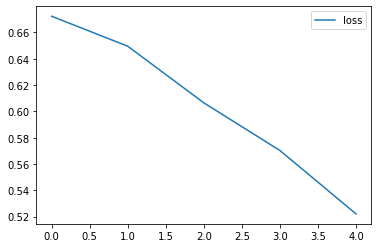

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend()
plt.show()
plt.savefig('Validation_Loss')

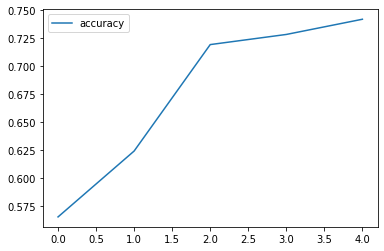

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()
plt.show()
plt.savefig('Validation_Accuracy')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('brain_tumor.h5')

## Prediction

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('brain_tumor.h5')

In [ ]:
imge_path = 'Data/no/10 no.jpg'

In [ ]:
single_image = image.load_img(imge_path,target_size=(260,260))
x = image.img_to_array(single_image)

In [ ]:
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)

In [ ]:
result = model.predict(img_data)
print(result)

[[0.73080397 0.26919606]]


In [ ]:
if result[0][0] > result[0][1]:
    prediction = 'Not A Brain Tumor'
else:
    prediction = 'Brain Tumor'
    
print(prediction)

Not A Brain Tumor
